In [100]:
import pandas as pd
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn import tree
import graphviz

## Portfolio assignment 17
30 min: Train a decision tree to predict the body_mass_g of a penguin based on their characteristics.
- Split the penguin dataset into a train (70%) and test (30%) set.
- Use the train set to fit a DecisionTreeRegressor. You are free to to choose which columns you want to use as feature variables and you are also free to choose the max_depth of the tree. 
<b>Note</b>: Some machine learning algorithms can not handle missing values. You will either need to 
 - replace missing values (with the mean or most popular value). For replacing missing values you can use .fillna(\<value\>) https://pandas.pydata.org/docs/reference/api/pandas.Series.fillna.html
 - remove rows with missing data.  You can remove rows with missing data with .dropna() https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dropna.html
- Use your decision tree model to make predictions for both the train and test set.
- Calculate the RMSE for both the train set predictions and test set predictions.
- Is the RMSE different? Did you expect this difference?
- Use the plot_tree_regression function above to create a plot of the decision tree. Take a few minutes to analyse the decision tree. Do you understand the tree?

In [101]:
penguins = sns.load_dataset("penguins")

In [102]:
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


##### .Fillna

In [103]:
# values = {'island' : 'Unknown', 'bill_length_mm' : penguins['bill_length_mm'].max(), 'bill_depth_mm' : penguins['bill_depth_mm'].max(), 
#           'flipper_length_mm' : penguins['flipper_length_mm'].max(), 'body_mass_g' : penguins['body_mass_g'].max(), 'sex' : 'Unknown'}
# newPenguins = penguins.fillna(value=values)
# newPenguins.head()

newPenguins = penguins.dropna()
newPenguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,Male


##### Test/train split

In [104]:
newPenguins_train, newPenguins_test = train_test_split(newPenguins, test_size=0.3, stratify=newPenguins['species'], random_state=42)
print(newPenguins_train.shape, newPenguins_test.shape)

(233, 7) (100, 7)


##### Evaluating

In [122]:
features= ['bill_length_mm']
dt_regression = DecisionTreeRegressor(max_depth = 2) # Increase max_depth to see effect in the plot
dt_regression.fit(newPenguins_train[features],newPenguins_train['body_mass_g'])

DecisionTreeRegressor(max_depth=2)

In [123]:
predictions =dt_regression.predict(newPenguins[features])

In [124]:
def calculate_rmse(predictions, actuals):
    if(len(predictions) != len(actuals)):
        raise Exception("The amount of predictions did not equal the amount of actuals")
    
    diffSquared = 0
    
    for prediction_i, actual_i in zip(predictions, actuals):
        diffSquared += (prediction_i - actual_i)**2
        
    return (diffSquared/len(actuals))**(1/2)

In [125]:
predictionsOnTrainset = dt_regression.predict(newPenguins_train[features])
predictionsOnTestset = dt_regression.predict(newPenguins_test[features])

rmseTrain = calculate_rmse(predictionsOnTrainset, newPenguins_train.body_mass_g)
rmseTest = calculate_rmse(predictionsOnTestset, newPenguins_test.body_mass_g)

print("RMSE on training set " + str(rmseTrain))
print("RMSE on test set " + str(rmseTest))

RMSE on training set 626.0398378931117
RMSE on test set 656.303008077467


##### Tree

In [126]:
from sklearn import tree
import graphviz

def plot_tree_regression(model, features):
    # Generate plot data
    dot_data = tree.export_graphviz(model, out_file=None, 
                          feature_names=features,  
                          filled=True, rounded=True,  
                          special_characters=True)  

    # Turn into graph using graphviz
    graph = graphviz.Source(dot_data)  

    # Write out a pdf
    graph.render("decision_tree")

    # Display in the notebook
    return graph 

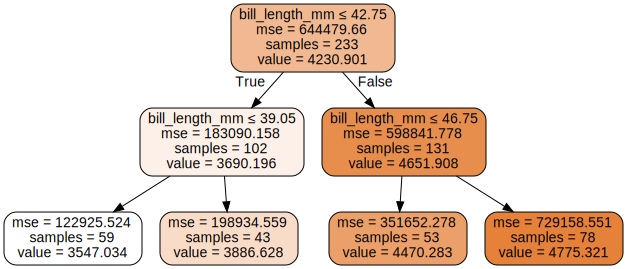

In [127]:
plot_tree_regression(dt_regression, features)